In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.ensemble import IsolationForest

C:\Users\shrik\AppData\Local\Temp\ipykernel_19364\2162656668.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


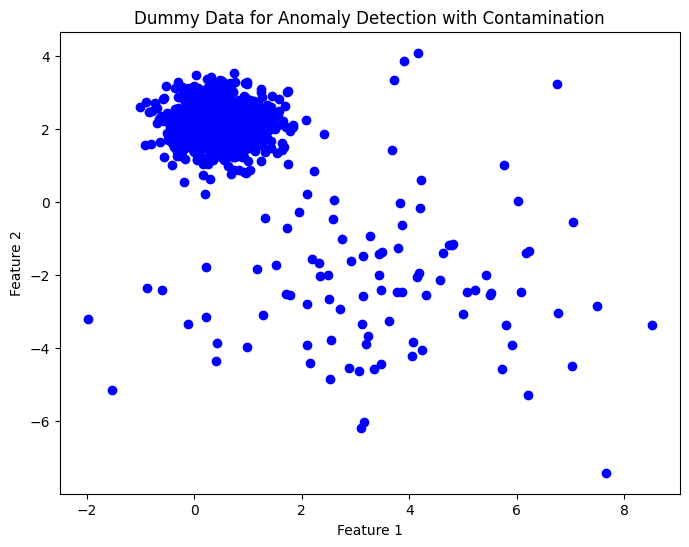

In [8]:
def generate_dummy_data(n_samples, contamination=0.1):
    # Generate normal data
    np.random.seed(0)
    normal_data, _ = make_blobs(n_samples=int(n_samples * (1 - contamination)), centers=1, cluster_std=0.5, center_box=(-5, 5))

    # Generate anomalies (contamination)
    anomaly_data, _ = make_blobs(n_samples=int(n_samples * contamination), centers=1, cluster_std=2, center_box=(-5, 5))

    # Combine normal and anomaly data
    data = np.vstack([normal_data, anomaly_data])

    # Shuffle the data
    np.random.shuffle(data)
    
    return data

# Example usage
data = generate_dummy_data(n_samples=1000, contamination=0.1)

# Visualize the data
plt.figure(figsize=(8, 6))
plt.scatter(data[:, 0], data[:, 1], c='b')
plt.title('Dummy Data for Anomaly Detection with Contamination')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


In [12]:
df = pd.DataFrame(data, columns=['column1','column2'])

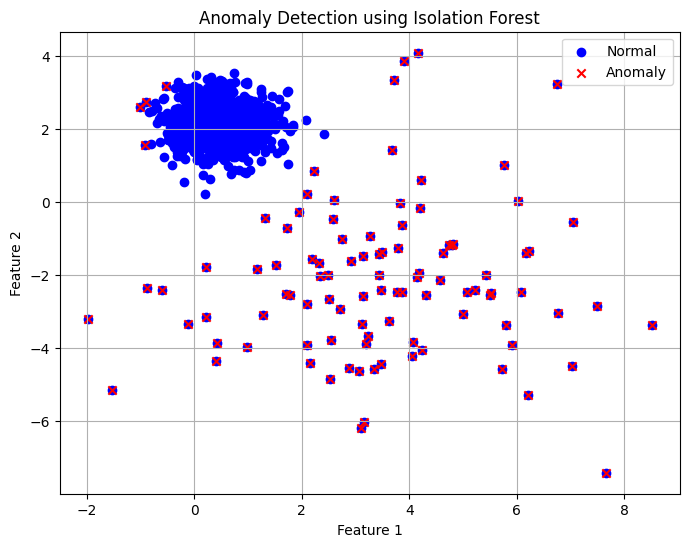

In [14]:
# Create and fit the Isolation Forest model
model = IsolationForest(contamination=0.1)  # contamination should be same as the contamination used to generate data
model.fit(df.values)

# Predict outliers/anomalies
outliers = model.predict(df.values)

# Anomalies will be labeled as -1, normal points as 1
anomaly_indices = np.where(outliers == -1)[0]

# Visualize the data with anomalies highlighted
plt.figure(figsize=(8, 6))
plt.scatter(data[:, 0], data[:, 1], c='b', marker='o', label='Normal')
plt.scatter(data[anomaly_indices, 0], data[anomaly_indices, 1], c='r', marker='x', label='Anomaly')
plt.title('Anomaly Detection using Isolation Forest')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()


In [22]:
#inference
given_point = [4,-4]
given_point = [np.array(given_point)]
model.predict(given_point)[0]

-1